#Assignment 1
##1. Use the use case in the class (DL_Lesson_1.ipynb & diabetes.csv):

In [24]:
# importing libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
# importing dataset
dataset = pd.read_csv("/content/sample_data/Breast Cancer.csv")

In [26]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [27]:
# dropping id column
dataset.drop('id', axis=1, inplace = True)
# dropping unnamed column
dataset.drop('Unnamed: 32', axis=1, inplace = True)

In [28]:
# checking dataset shape
dataset.shape

(569, 31)

In [29]:
# checking diagnosis unique values
dataset.diagnosis.unique()
# Mapping diagnosis values M to 1 and B to 0
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1,'B':0})
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
# assigning columns to respective dataset to allow splitting into X and Y train and test data
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [31]:
# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
scaled_data = sc.fit_transform(dataset)
scaled_data

array([[ 1.29767572,  1.09706398, -2.07333501, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.29767572,  1.82982061, -0.35363241, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.29767572,  1.57988811,  0.45618695, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 1.29767572,  0.70228425,  2.0455738 , ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.29767572,  1.83834103,  2.33645719, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-0.77060855, -1.80840125,  1.22179204, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [32]:
# splitting train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# checking train data shape
print(X_train.shape)

(426, 30)


## a. Add more Dense layers to the existing code and check how the accuracy changes.

In [34]:
model = keras.Sequential() # create model
model.add(layers.Dense(32, input_dim=30, activation='relu')) # Input layer
model.add(layers.Dense(64, activation='relu')) # hidden layer 1
model.add(layers.Dense(128, activation='relu')) # hidden layer 2
model.add(layers.Dense(1, activation='sigmoid')) # output layer
# compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# printing summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 64)                2112      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


In [35]:
# fitting model without validation
my_first_nn_fitted = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 5ms/step - loss: 2.0509 - accuracy: 0.7207
Epoch 2/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3041 - accuracy: 0.8991
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5359 - accuracy: 0.8756
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.7390 - accuracy: 0.8028
Epoch 5/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3341 - accuracy: 0.9014
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3254 - accuracy: 0.9038
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3150 - accuracy: 0.8920
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2916 - accuracy: 0.9038
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3873 - accuracy: 0.8685
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4802 - accuracy: 0.8568
Epoch 11/

In [36]:
# getting test score from data without normalization and print
scores = model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9650


In [37]:
print(scores)

[0.09977604448795319, 0.9650349617004395]


## b. Add the validation_data=(X_test, Y_test) attribute to .fit() method.

In [38]:
# fitting model and validating with test data
nn_fitted = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), shuffle=True)

Epoch 1/100
14/14 [==============================] - 0s 10ms/step - loss: 0.2141 - accuracy: 0.9272 - val_loss: 0.1169 - val_accuracy: 0.9441
Epoch 2/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1464 - accuracy: 0.9507 - val_loss: 0.1190 - val_accuracy: 0.9510
Epoch 3/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1700 - accuracy: 0.9296 - val_loss: 0.0886 - val_accuracy: 0.9510
Epoch 4/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1897 - accuracy: 0.9413 - val_loss: 0.1063 - val_accuracy: 0.9510
Epoch 5/100
14/14 [==============================] - 0s 8ms/step - loss: 0.1582 - accuracy: 0.9343 - val_loss: 0.1633 - val_accuracy: 0.9371
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.2179 - accuracy: 0.9085 - val_loss: 0.2240 - val_accuracy: 0.9231
Epoch 7/100
14/14 [==============================] - 0s 8ms/step - loss: 0.2657 - accuracy: 0.9014 - val_loss: 0.2097 - val_accuracy: 0.9161
Epoch 8/100


## c. Plot the accuracy for training and validation (one plot for both: train and test accuracy).

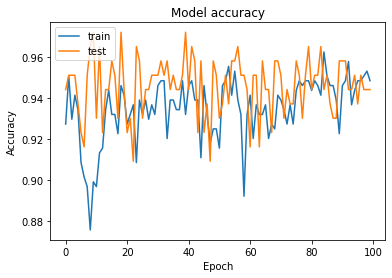

In [39]:
# plotting history for accuracy
import matplotlib.pyplot as plt
# plotting accuracy
plt.plot(nn_fitted.history['accuracy'])
# plotting the val
plt.plot(nn_fitted.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## d. Plot the loss for training and validation (one plot for both: train and test loss).

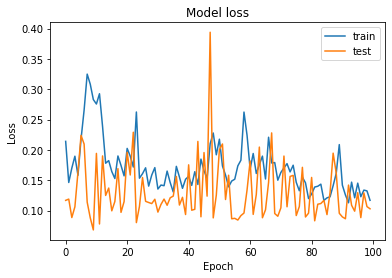

In [40]:
# plotting history for loss
plt.plot(nn_fitted.history['loss'])
# ploting the val
plt.plot(nn_fitted.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [41]:
# getting test score from data before normalization and print
scores_test = model.evaluate(X_test, Y_test)
print(f'Loss score for test data: {scores_test}')

5/5 [==============================] - 0s 6ms/step - loss: 0.1030 - accuracy: 0.9441
Loss score for test data: [0.10300122201442719, 0.9440559148788452]


## e. Normalize the data before feeding to the model and check how the normalization changes your accuracy sue the StandardScaler() from scikit learn.

In [42]:
# splitting train and test data from normalized dataset
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data[:,1:], scaled_data[:,0], test_size=0.25, random_state=42)

In [43]:
# getting test score from data after normalization and print
scores_test = model.evaluate(X_test, Y_test)
print(f'Loss score for test data: {scores_test}')

5/5 [==============================] - 0s 10ms/step - loss: -0.4795 - accuracy: 0.0000e+00
Loss score for test data: [-0.47945472598075867, 0.0]
